# BMW Used Car Market EDA

## Dataset
https://www.kaggle.com/datasets/algozee/bmw-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('bmw_used_car_market_analysis.csv')

In [3]:
# Display basic info
print("Dataset Shape (Rows, Columns):", df.shape)
print("\n--- Data Types ---")
df.info()

Dataset Shape (Rows, Columns): (10781, 9)

--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [4]:
# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


# Data Cleaning

In [5]:
# 1. Handling Duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicate_count}")


Duplicate rows found: 117


In [6]:
# Remove duplicates
df_clean = df.drop_duplicates()
print(f"Shape after removing duplicates: {df_clean.shape}")

Shape after removing duplicates: (10664, 9)


In [7]:
# 2. Handling Anomalies (Engine Size = 0)
# Identify records where engine size is 0 but fuel type is Petrol or Diesel
invalid_engine = df_clean[
    (df_clean['engineSize'] == 0) & 
    (df_clean['fuelType'].isin(['Petrol', 'Diesel']))
]
print(f"Invalid engine size entries (Petrol/Diesel with 0.0L): {len(invalid_engine)}")

Invalid engine size entries (Petrol/Diesel with 0.0L): 12


In [8]:
# Drop these specific invalid rows
df_clean = df_clean.drop(invalid_engine.index)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10652 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10652 non-null  object 
 1   year          10652 non-null  int64  
 2   price         10652 non-null  int64  
 3   transmission  10652 non-null  object 
 4   mileage       10652 non-null  int64  
 5   fuelType      10652 non-null  object 
 6   tax           10652 non-null  int64  
 7   mpg           10652 non-null  float64
 8   engineSize    10652 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 832.2+ KB


# Statistics & Analysis

In [11]:
# Compute descriptive statistics
stats = df_clean.describe().round(2)

In [12]:
# Calculate Range explicitly (Max - Min)
range_vals = df_clean.select_dtypes(include=[np.number]).max() - df_clean.select_dtypes(include=[np.number]).min()
stats.loc['range'] = range_vals

In [13]:
# Display statistics
print("Summary Statistics:")
print(stats)

Summary Statistics:
           year     price    mileage       tax       mpg  engineSize
count  10652.00   10652.0   10652.00  10652.00  10652.00    10652.00
mean    2017.06   22699.1   25711.31    131.58     56.48        2.17
std        2.35   11437.3   25159.17     61.47     31.48        0.55
min     1996.00    1200.0       1.00      0.00      5.50        0.00
25%     2016.00   14900.0    5662.50    135.00     45.60        2.00
50%     2017.00   20296.5   18738.00    145.00     53.30        2.00
75%     2019.00   27898.0   38478.50    145.00     62.80        2.00
max     2020.00  123456.0  214000.00    580.00    470.80        6.60
range     24.00  122256.0  213999.00    580.00    465.30        6.60


# Visualizations

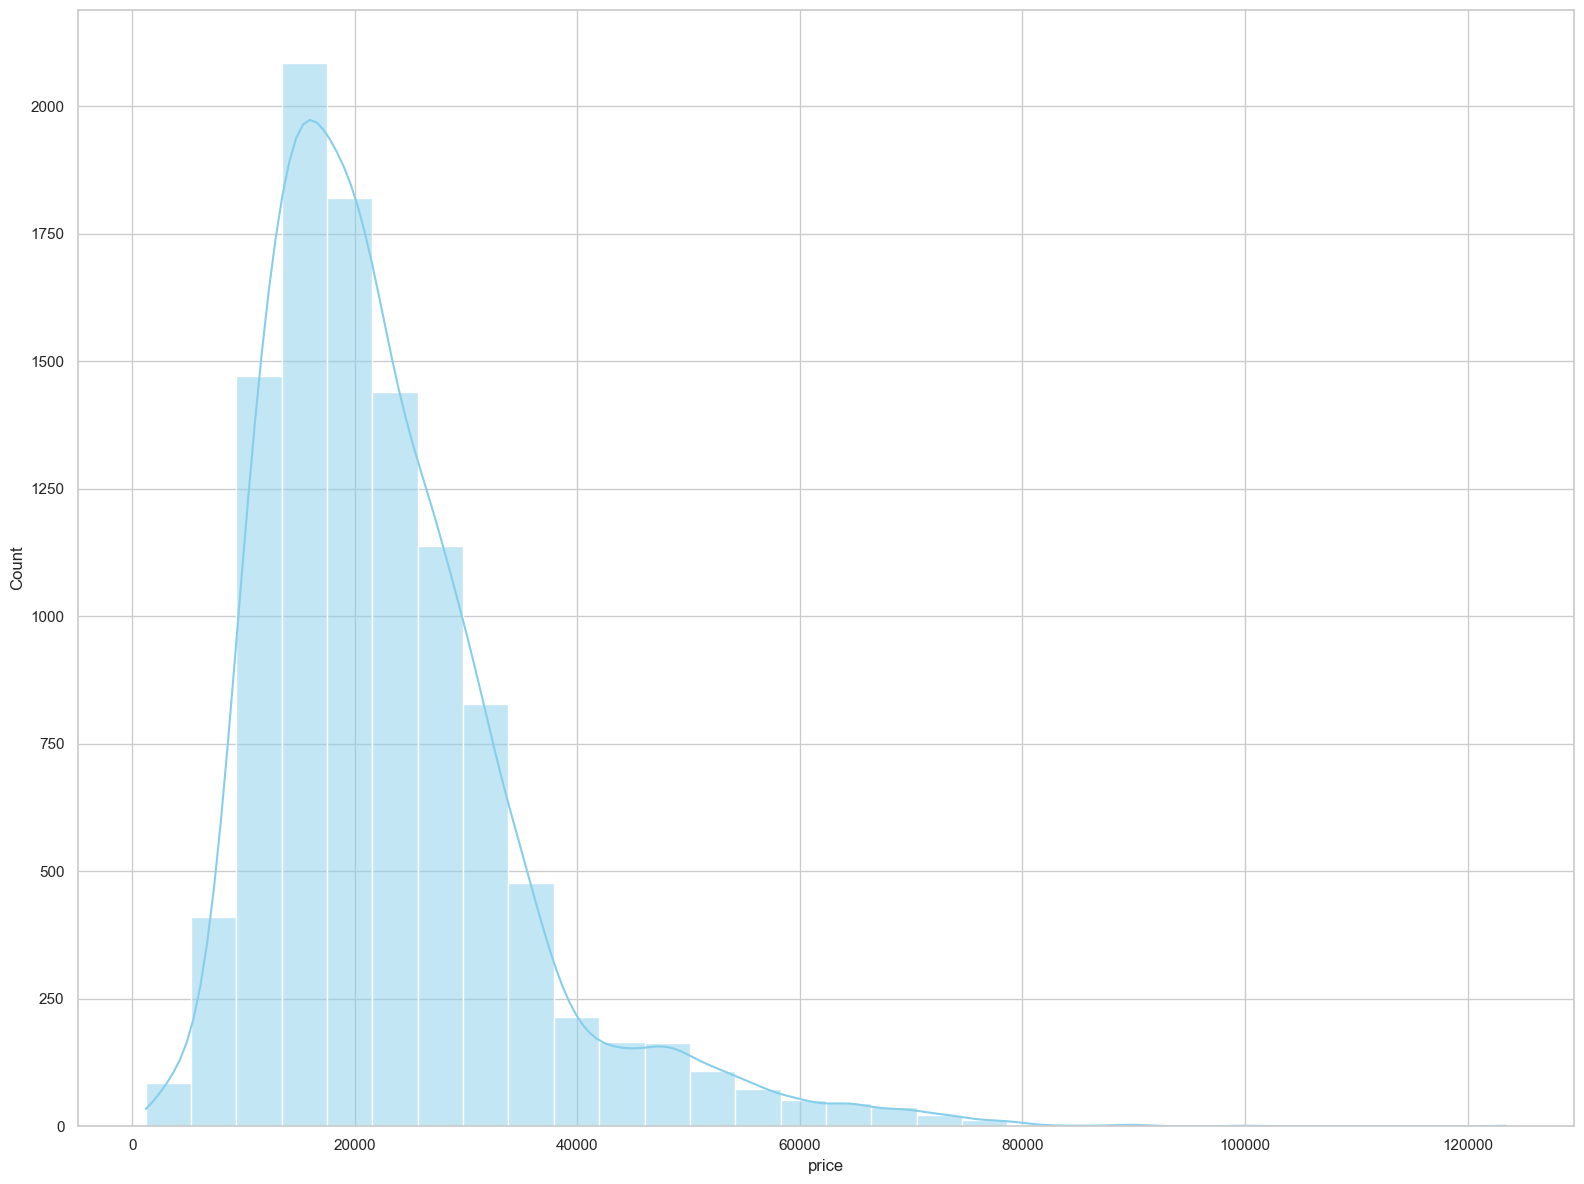

In [21]:
# 1. Distribution of Price (Histogram)
fig= plt.subplots(figsize=(16, 12))
sns.histplot(data=df_clean, x='price', bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of Car Prices')
axes[0, 0].set_xlabel('Price (£)')

plt.tight_layout()
plt.show()

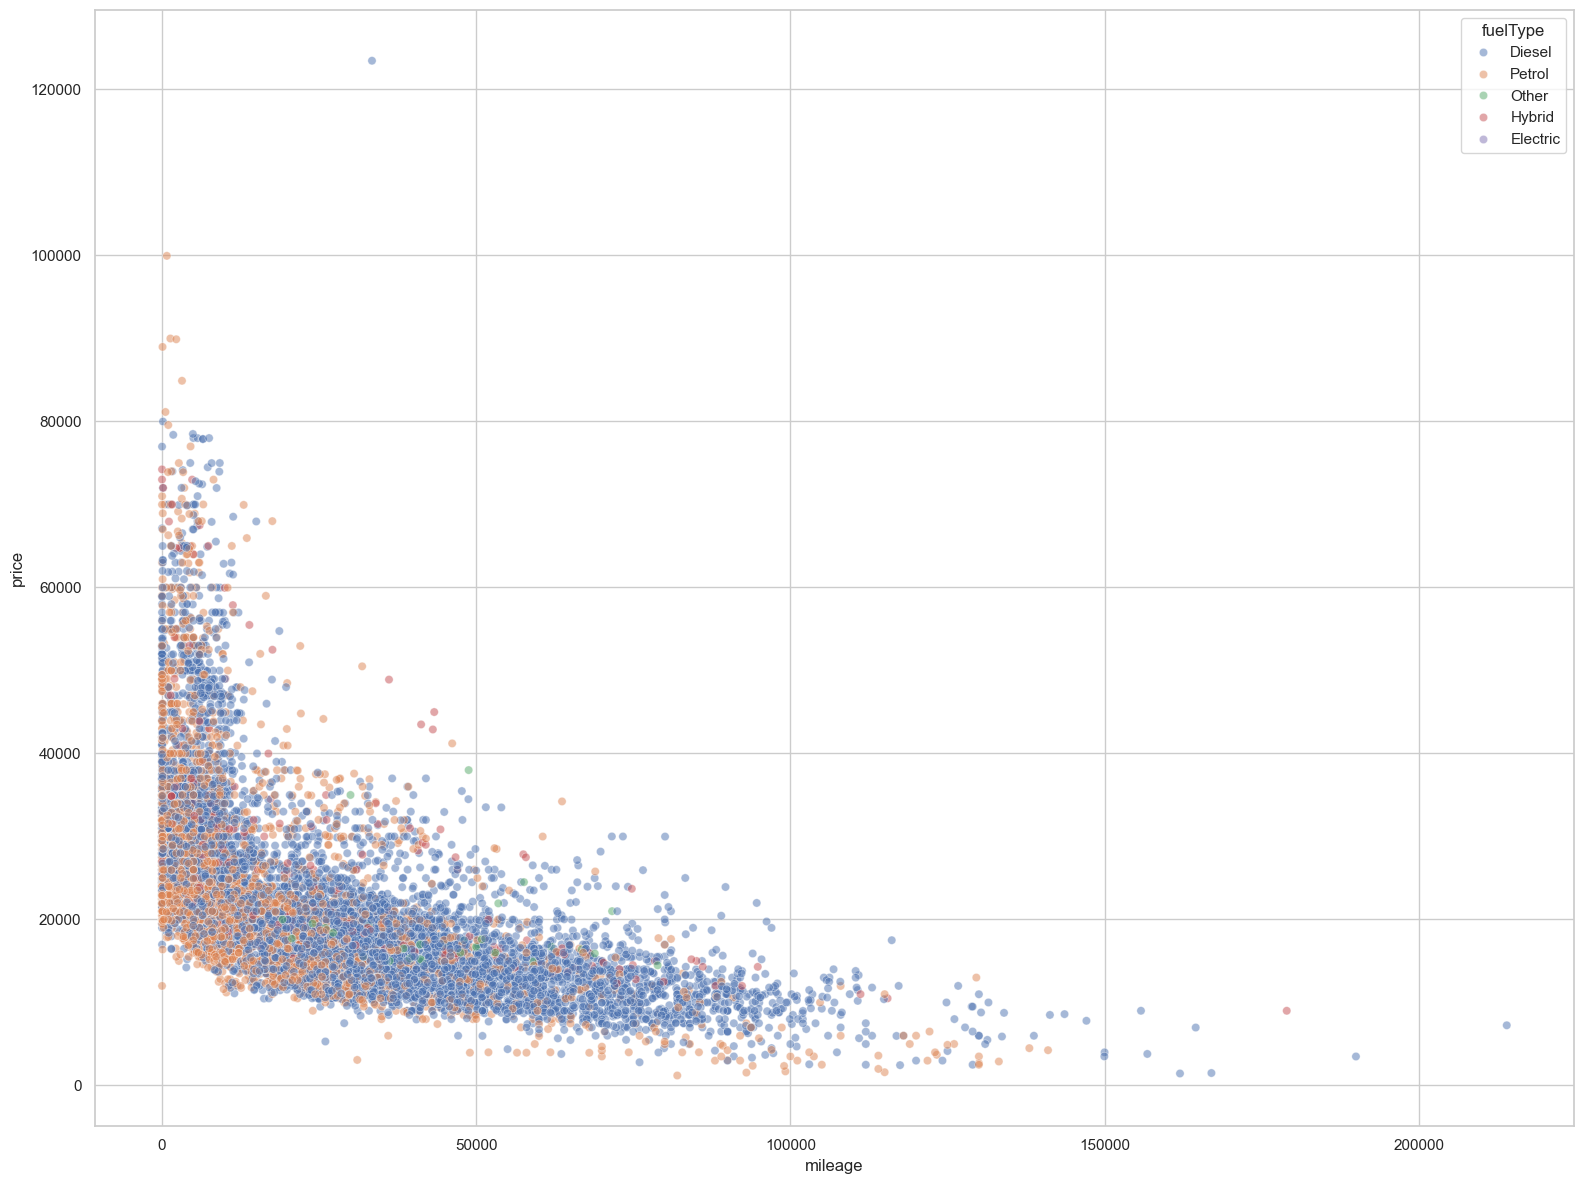

In [23]:
# 2. Price vs. Mileage (Scatter Plot)
fig= plt.subplots(figsize=(16, 12))
sns.scatterplot(data=df_clean, x='mileage', y='price', alpha=0.5, hue='fuelType')
axes[0, 1].set_title('Price vs. Mileage (colored by Fuel Type)')
axes[0, 1].set_xlabel('Mileage')
axes[0, 1].set_ylabel('Price (£)')

plt.tight_layout()
plt.show()

C:\Users\ruchi\AppData\Local\Temp\ipykernel_25928\3521649266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='model', order=top_10_models, palette='viridis')


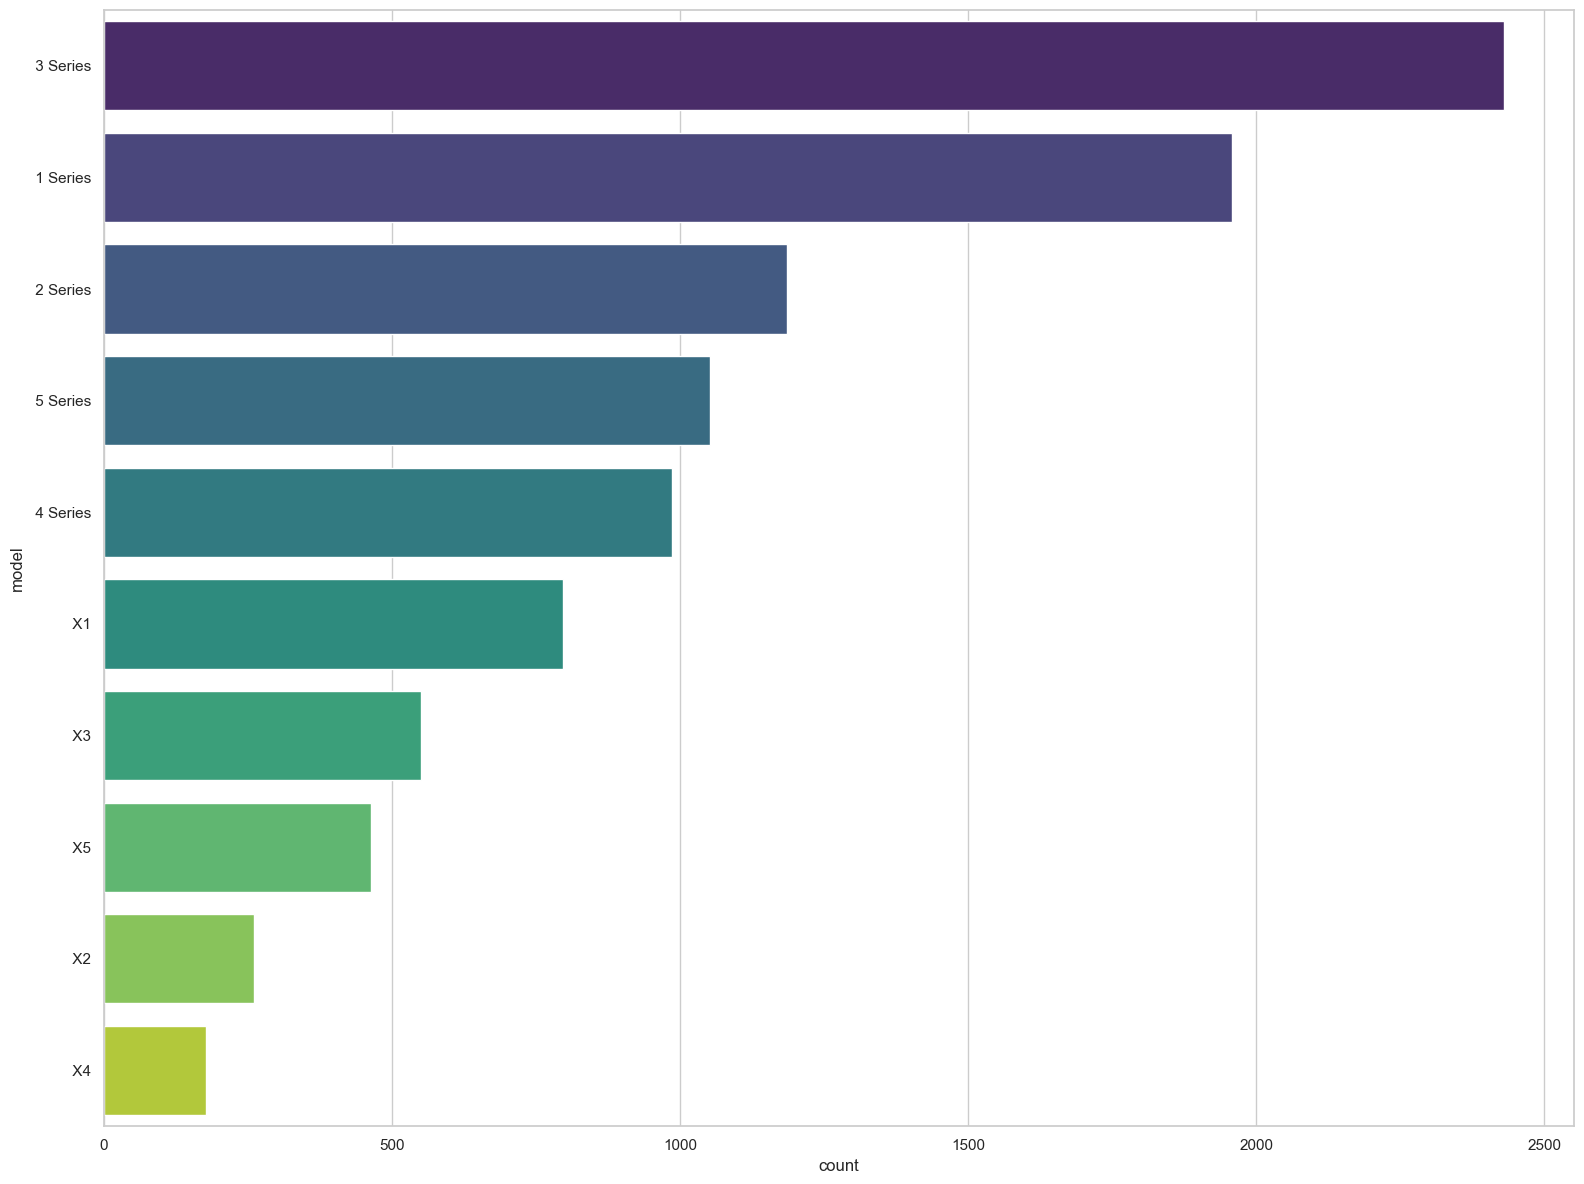

In [24]:
# 3.Top 10 Most Common Models ( Bar Chart)
fig= plt.subplots(figsize=(16, 12))
top_10_models = df_clean['model'].value_counts().head(10).index
sns.countplot(data=df_clean, y='model', order=top_10_models, palette='viridis')
axes[1, 0].set_title('Top 10 Most Common BMW Models')
axes[1, 0].set_xlabel('Count')

plt.tight_layout()
plt.show()

C:\Users\ruchi\AppData\Local\Temp\ipykernel_25928\18879469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='transmission', y='price', palette='pastel')


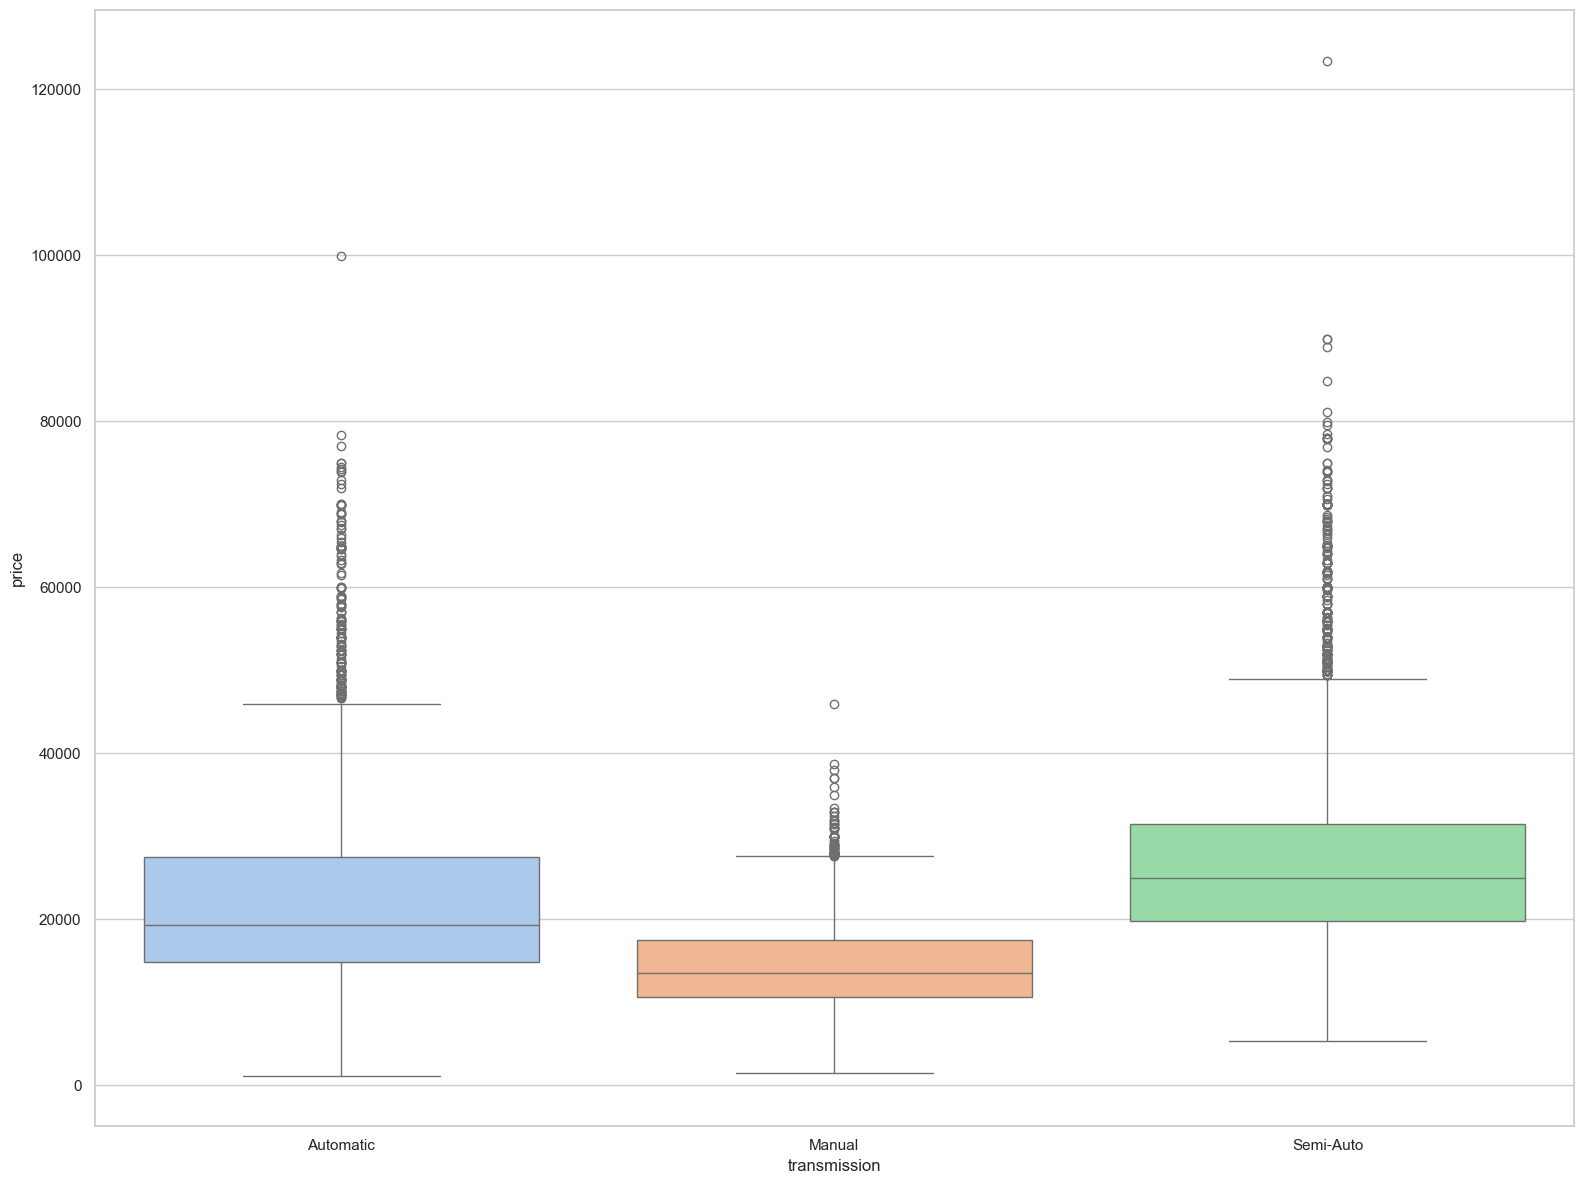

In [25]:
# 4. Price by Transmission (Box Plot)
fig= plt.subplots(figsize=(16, 12))
sns.boxplot(data=df_clean, x='transmission', y='price', palette='pastel')
axes[1, 1].set_title('Price Distribution by Transmission Type')
axes[1, 1].set_xlabel('Transmission')
axes[1, 1].set_ylabel('Price (£)')

plt.tight_layout()
plt.show()

# Questions & Answers

### 1. Which BMW model has the highest average resale price?

In [26]:
# Group by model and calculate mean price, then sort
avg_price_model = df_clean.groupby('model')['price'].mean().sort_values(ascending=False)
print("Most Expensive Model on Average:", avg_price_model.idxmax())
print(f"Average Price: £{avg_price_model.max():.2f}")
print("\nTop 5 Most Expensive Models:\n", avg_price_model.head())

Most Expensive Model on Average:  X7
Average Price: £69842.76

Top 5 Most Expensive Models:
 model
X7          69842.763636
8 Series    63997.794872
M5          57760.000000
i8          57012.588235
X6          43838.613208
Name: price, dtype: float64


### 2. How does the year of manufacture impact the average fuel efficiency (MPG)?

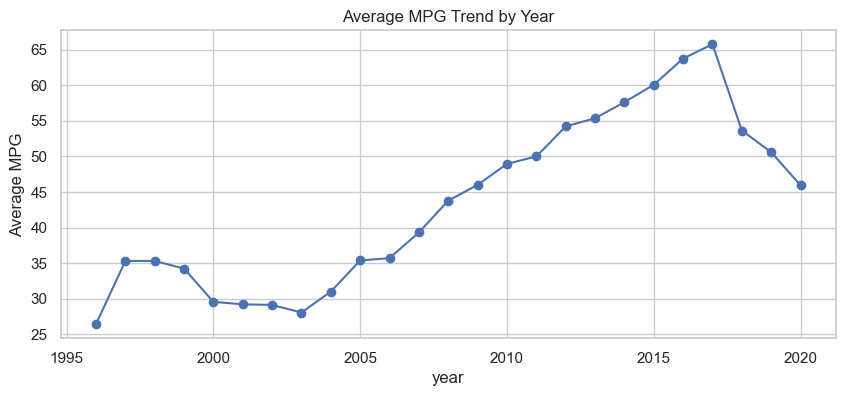

Average MPG for 2020: 45.93088642659279


In [27]:
# Group by year and calculate mean MPG
mpg_trend = df_clean.groupby('year')['mpg'].mean()

# Quick plot to visualize the answer
plt.figure(figsize=(10, 4))
mpg_trend.plot(marker='o', linestyle='-')
plt.title('Average MPG Trend by Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()

print("Average MPG for 2020:", mpg_trend.loc[2020])

### 3. What is the market share of different fuel types in this dataset?

In [28]:
fuel_share = df_clean['fuelType'].value_counts(normalize=True) * 100
print("Market Share by Fuel Type (%):")
print(fuel_share)

Market Share by Fuel Type (%):
fuelType
Diesel      65.518213
Petrol      31.327450
Hybrid       2.788209
Other        0.337965
Electric     0.028164
Name: proportion, dtype: float64


### 4. Is there a correlation between Engine Size and Tax?

In [29]:
# Calculate correlation matrix
correlation = df_clean[['engineSize', 'tax']].corr().iloc[0, 1]
print(f"Correlation coefficient between Engine Size and Tax: {correlation:.4f}")

Correlation coefficient between Engine Size and Tax: 0.4376


# Summary